In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np
from matplotlib import rc
import pandas as pd

In [2]:
def grafico_cluster(nombre_archivo, e_fermi, cota_menor, cota_mayor, nombre):
    
    mag = np.loadtxt(nombre_archivo)

    #mag = mag[mag[:,0]<-2]

    mag[:,0] = mag[:,0]-e_fermi
    
    mag = mag[mag[:,0]<0.5]
    mag = mag[mag[:,0]>-5]
    
    fig = plt.figure()

    ax0 = plt.subplot2grid((1, 5), (0, 0), colspan=4, label="Up")
    ax1 = plt.subplot2grid((1, 5), (0, 4), colspan=1, label="Down")

    ax0.set_xlabel(r"E-E$_{F}$",fontsize=13)
    ax0.set_ylabel(r"DOS (A.U.)",fontsize=13)

    ax0.plot(mag[:,0],mag[:,1])
    ax0.plot(mag[:,0],-mag[:,2])

    mag_ = mag[mag[:,0]<cota_mayor]
    mag_ = mag_[mag_[:,0]>cota_menor]

    ax1.plot(mag_[:,0],mag_[:,1], label="Up")
    ax1.plot(mag_[:,0],-mag_[:,2],label="Down")

    ax1.set_xlabel(r"E-E$_{F}$",fontsize=13)

    plt.legend(loc='upper left', fontsize=9, bbox_to_anchor=(1.05, 1.0))
    fig.set_size_inches(12, 4)
    plt.savefig('../../graficos/'+nombre,dpi=300)
    plt.show() 

In [3]:
def grafico_unico(nombre_archivo, e_fermi, cota_menor, cota_mayor, nombre):
    
    temp1 = np.loadtxt(nombre_archivo+'_wfc#1(s)')

    mag_s = temp1[:,[0]]
    mag_s = np.append(mag_s, temp1[:,[1]], axis=1)
    mag_s = np.append(mag_s, temp1[:,[2]], axis=1)

    temp1 = np.loadtxt(nombre_archivo+'_wfc#2(p)')

    mag_p = temp1[:,[0]]
    mag_p = np.append(mag_p, temp1[:,[1]], axis=1)
    mag_p = np.append(mag_p, temp1[:,[2]], axis=1)

    temp1 = np.loadtxt(nombre_archivo+'_wfc#3(d)')

    mag_d = temp1[:,[0]]
    mag_d = np.append(mag_d, temp1[:,[1]], axis=1)
    mag_d = np.append(mag_d, temp1[:,[2]], axis=1)


    fig = plt.figure()

    mag_s[:,0] = mag_s[:,0] - e_fermi
    mag_p[:,0] = mag_p[:,0] - e_fermi
    mag_d[:,0] = mag_d[:,0] - e_fermi
    
    mag_s = mag_s[mag_s[:,0]<0.5]
    mag_p = mag_p[mag_p[:,0]<0.5]
    mag_d = mag_d[mag_d[:,0]<0.5]

    mag_s = mag_s[mag_s[:,0]>-5]
    mag_p = mag_p[mag_p[:,0]>-5]
    mag_d = mag_d[mag_d[:,0]>-5]


    ax0 = plt.subplot2grid((1, 5), (0, 0), colspan=4)
    ax1 = plt.subplot2grid((1, 5), (0, 4), colspan=1)

    ax0.set_xlabel(r"E-E$_{F}$",fontsize=13)
    ax0.set_ylabel(r"DOS (A.U.)",fontsize=13)


    ax0.plot(mag_s[:,0],mag_s[:,1], label="S (Up)")
    ax0.plot(mag_s[:,0],-mag_s[:,2],label="S (Down)")
    ax0.plot(mag_p[:,0],mag_p[:,1], label="P (Up)")
    ax0.plot(mag_p[:,0],-mag_p[:,2], label="P (Down)")
    ax0.plot(mag_d[:,0],mag_d[:,1], label="D (Up)")
    ax0.plot(mag_d[:,0],-mag_d[:,2], label="D (Down)")


    mag_s = mag_s[mag_s[:,0]>cota_menor]
    mag_s = mag_s[mag_s[:,0]<cota_mayor]

    mag_p = mag_p[mag_p[:,0]>cota_menor]
    mag_p = mag_p[mag_p[:,0]<cota_mayor]

    mag_d = mag_d[mag_d[:,0]>cota_menor]
    mag_d = mag_d[mag_d[:,0]<cota_mayor]


    ax1.plot(mag_s[:,0],mag_s[:,1], label="S (Up)")
    ax1.plot(mag_s[:,0],-mag_s[:,2],label="S (Down)")
    ax1.plot(mag_p[:,0],mag_p[:,1], label="P (Up)")
    ax1.plot(mag_p[:,0],-mag_p[:,2], label="P (Down)")
    ax1.plot(mag_d[:,0],mag_d[:,1], label="D (Up)")
    ax1.plot(mag_d[:,0],-mag_d[:,2], label="D (Down)")

    ax1.set_xlabel(r"E-E$_{F}$",fontsize=13)

    plt.legend(loc='upper left', fontsize=9, bbox_to_anchor=(1.05, 1.0))
    fig.set_size_inches(12, 4)
    plt.savefig('../../graficos/'+nombre,dpi=300)
    plt.show()

In [4]:
def magne(nombre_archivo, e_fermi, cota_menor):
    mag = np.loadtxt(nombre_archivo)
    mag = mag[mag[:,0] < e_fermi]
    mag[:,0] = mag[:,0] - e_fermi
    mag = mag[mag[:,0] > cota_menor]
    magnetizacion = mag[:,1].sum()*0.001 - mag[:,2].sum()*0.001
    return magnetizacion

In [5]:
def delta_magne(nombre_archivo, e_fermi, cota_menor):
    mag = np.loadtxt(nombre_archivo)
    mag = mag[mag[:,0] < e_fermi]
    mag[:,0] = mag[:,0] - e_fermi
    mag = mag[mag[:,0] > cota_menor]
    mag_ = mag
    mag_[:,1] = 0.000005
    magnetizacion = 2*mag_[:,1].sum()*0.001
    return magnetizacion

In [6]:
def carga(nombre_archivo, e_fermi):
    mag = np.loadtxt(nombre_archivo)
    mag = mag[mag[:,0] < e_fermi]
    carga = mag[:,1].sum()*0.001+mag[:,2].sum()*0.001
    return carga

In [7]:
def delta_carga(nombre_archivo, e_fermi):
    mag = np.loadtxt(nombre_archivo)
    mag = mag[mag[:,0] < e_fermi]
    mag_ = mag
    mag_[:,1] = 0.000005
    carga = 2*mag[:,1].sum()*0.001
    return carga

In [8]:
def magne_parcial(nombre_archivo, e_fermi, cota):
    
    temp1 = np.loadtxt(nombre_archivo+'_wfc#1(s)')

    mag_s = temp1[:,[0]]
    mag_s = np.append(mag_s, temp1[:,[1]], axis=1)
    mag_s = np.append(mag_s, temp1[:,[2]], axis=1)

    temp1 = np.loadtxt(nombre_archivo+'_wfc#2(p)')

    mag_p = temp1[:,[0]]
    mag_p = np.append(mag_p, temp1[:,[1]], axis=1)
    mag_p = np.append(mag_p, temp1[:,[2]], axis=1)

    temp1 = np.loadtxt(nombre_archivo+'_wfc#3(d)')

    mag_d = temp1[:,[0]]
    mag_d = np.append(mag_d, temp1[:,[1]], axis=1)
    mag_d = np.append(mag_d, temp1[:,[2]], axis=1)    

    mag_s[:,0] = mag_s[:,0] - e_fermi
    mag_p[:,0] = mag_p[:,0] - e_fermi
    mag_d[:,0] = mag_d[:,0] - e_fermi
    
    mag_s = mag_s[mag_s[:,0]>cota]
    mag_p = mag_p[mag_p[:,0]>cota]
    mag_d = mag_d[mag_d[:,0]>cota]
    
    mag_s = mag_s[mag_s[:,0]<0]
    mag_p = mag_p[mag_p[:,0]<0]
    mag_d = mag_d[mag_d[:,0]<0]

    magnetizacion = (mag_s[:,1].sum()+mag_p[:,1].sum()+mag_d[:,1].sum())*0.001 -  (mag_s[:,2].sum()+mag_p[:,2].sum()+mag_d[:,2].sum())*0.001   

    return magnetizacion

In [9]:
def delta_magne_parcial(nombre_archivo, e_fermi, cota):
    
    temp1 = np.loadtxt(nombre_archivo+'_wfc#1(s)')

    mag_s = temp1[:,[0]]
    mag_s = np.append(mag_s, temp1[:,[1]], axis=1)
    mag_s = np.append(mag_s, temp1[:,[2]], axis=1)

    temp1 = np.loadtxt(nombre_archivo+'_wfc#2(p)')

    mag_p = temp1[:,[0]]
    mag_p = np.append(mag_p, temp1[:,[1]], axis=1)
    mag_p = np.append(mag_p, temp1[:,[2]], axis=1)

    temp1 = np.loadtxt(nombre_archivo+'_wfc#3(d)')

    mag_d = temp1[:,[0]]
    mag_d = np.append(mag_d, temp1[:,[1]], axis=1)
    mag_d = np.append(mag_d, temp1[:,[2]], axis=1)    

    mag_s[:,0] = mag_s[:,0] - e_fermi
    mag_p[:,0] = mag_p[:,0] - e_fermi
    mag_d[:,0] = mag_d[:,0] - e_fermi
    
    mag_s = mag_s[mag_s[:,0]>cota]
    mag_p = mag_p[mag_p[:,0]>cota]
    mag_d = mag_d[mag_d[:,0]>cota]
    
    mag_s = mag_s[mag_s[:,0]<0]
    mag_p = mag_p[mag_p[:,0]<0]
    mag_d = mag_d[mag_d[:,0]<0]
    
    mag_s[:,1] = 0.000005
    mag_p[:,1] = 0.000005
    mag_d[:,1] = 0.000005

    magnetizacion = 2*(mag_s[:,1].sum()+mag_p[:,1].sum()+mag_d[:,1].sum())*0.001   

    return magnetizacion

In [10]:
def carga_parcial(nombre_archivo, e_fermi):

    temp1 = np.loadtxt(nombre_archivo+'_wfc#1(s)')

    mag_s = temp1[:,[0]]
    mag_s = np.append(mag_s, temp1[:,[1]], axis=1)
    mag_s = np.append(mag_s, temp1[:,[2]], axis=1)

    temp1 = np.loadtxt(nombre_archivo+'_wfc#2(p)')

    mag_p = temp1[:,[0]]
    mag_p = np.append(mag_p, temp1[:,[1]], axis=1)
    mag_p = np.append(mag_p, temp1[:,[2]], axis=1)

    temp1 = np.loadtxt(nombre_archivo+'_wfc#3(d)')

    mag_d = temp1[:,[0]]
    mag_d = np.append(mag_d, temp1[:,[1]], axis=1)
    mag_d = np.append(mag_d, temp1[:,[2]], axis=1)    

    mag_s[:,0] = mag_s[:,0] - e_fermi
    mag_p[:,0] = mag_p[:,0] - e_fermi
    mag_d[:,0] = mag_d[:,0] - e_fermi
    
    mag_s = mag_s[mag_s[:,0]<0]
    mag_p = mag_p[mag_p[:,0]<0]
    mag_d = mag_d[mag_d[:,0]<0]
    
    
    carga = (mag_s[:,1].sum()+mag_p[:,1].sum()+mag_d[:,1].sum())*0.001 + (mag_s[:,2].sum()+mag_p[:,2].sum()+mag_d[:,2].sum())*0.001   
    return carga

In [11]:
def delta_carga_parcial(nombre_archivo, e_fermi):

    temp1 = np.loadtxt(nombre_archivo+'_wfc#1(s)')

    mag_s = temp1[:,[0]]
    mag_s = np.append(mag_s, temp1[:,[1]], axis=1)
    mag_s = np.append(mag_s, temp1[:,[2]], axis=1)

    temp1 = np.loadtxt(nombre_archivo+'_wfc#2(p)')

    mag_p = temp1[:,[0]]
    mag_p = np.append(mag_p, temp1[:,[1]], axis=1)
    mag_p = np.append(mag_p, temp1[:,[2]], axis=1)

    temp1 = np.loadtxt(nombre_archivo+'_wfc#3(d)')

    mag_d = temp1[:,[0]]
    mag_d = np.append(mag_d, temp1[:,[1]], axis=1)
    mag_d = np.append(mag_d, temp1[:,[2]], axis=1)    

    mag_s[:,0] = mag_s[:,0] - e_fermi
    mag_p[:,0] = mag_p[:,0] - e_fermi
    mag_d[:,0] = mag_d[:,0] - e_fermi
    
    mag_s = mag_s[mag_s[:,0]<0]
    mag_p = mag_p[mag_p[:,0]<0]
    mag_d = mag_d[mag_d[:,0]<0]
    
    mag_s[:,1] = 0.000005
    mag_p[:,1] = 0.000005
    mag_d[:,1] = 0.000005
    
    carga = 2*(mag_s[:,1].sum()+mag_p[:,1].sum()+mag_d[:,1].sum())*0.001  
    return carga

In [12]:
!pwd

/Users/esteban/quantumEspresso/Python


# Ag13

In [13]:
cd ../ag13/dos2

/Users/esteban/quantumEspresso/ag13/dos2


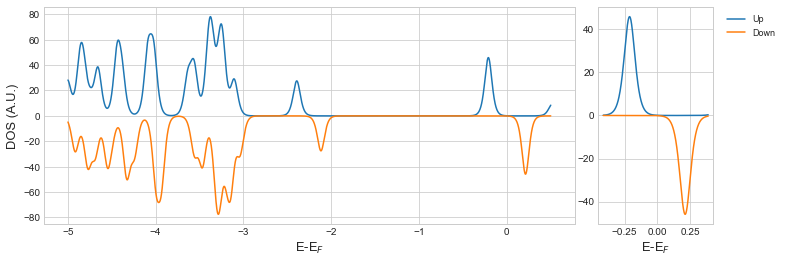

In [14]:
grafico_cluster('ag13.dos',-3.688,-0.412,0.388, 'Ag13')

# Atomo Lateral de Ag13

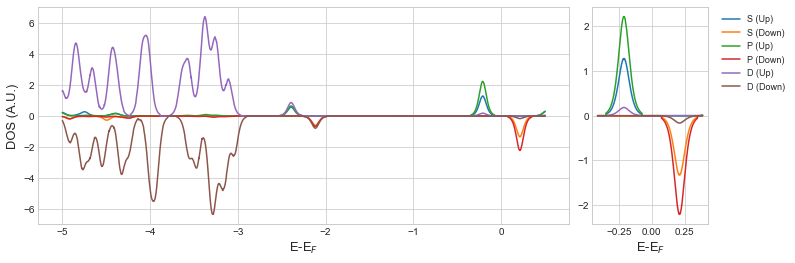

In [15]:
grafico_unico('ag13.dos.pdos_atm#2(Ag)',-3.688,-0.412,0.388,'plata_lateral_ag13')

# Átomo Central de Ag13

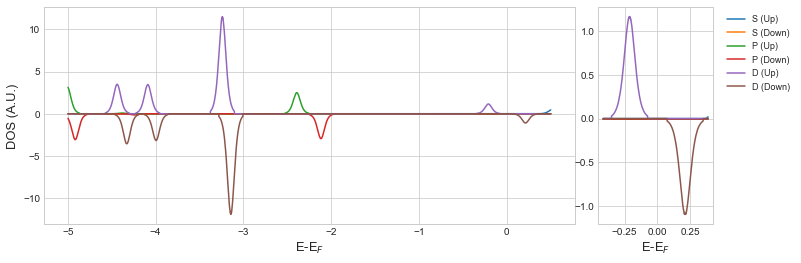

In [16]:
grafico_unico('ag13.dos.pdos_atm#8(Ag)',-3.688,-0.412,0.388,'plata_central_ag13')

In [17]:
dic = {}
dic['Ag13'] = [magne('ag13.dos',-3.688,-1),carga('ag13.dos',-3.688)]
dic['Plata Lateral'] = [magne_parcial('ag13.dos.pdos_atm#2(Ag)',-3.688,-1),carga_parcial('ag13.dos.pdos_atm#2(Ag)',-3.688)]
dic['Plata Central'] = [magne_parcial('ag13.dos.pdos_atm#8(Ag)',-3.688,-1),carga_parcial('ag13.dos.pdos_atm#8(Ag)',-3.688)]

Ag13_df = df = pd.DataFrame(dic).T
Ag13_df.columns = ['Magnetizacion', 'Carga']
Ag13_df

,Magnetizacion,Carga
Ag13,4.995835,142.948351
Plata Lateral,0.396435,10.806471
Plata Central,0.124609,11.239042


In [18]:
dic = {}
dic['Ag13'] = [delta_magne('ag13.dos',-3.688,-1),delta_carga('ag13.dos',-3.688)]
dic['Plata Lateral'] = [delta_magne_parcial('ag13.dos.pdos_atm#2(Ag)',-3.688,-1),delta_carga_parcial('ag13.dos.pdos_atm#2(Ag)',-3.688)]
dic['Plata Central'] = [delta_magne_parcial('ag13.dos.pdos_atm#8(Ag)',-3.688,-1),delta_carga_parcial('ag13.dos.pdos_atm#8(Ag)',-3.688)]

Ag13_df = df = pd.DataFrame(dic).T
Ag13_df.columns = ['Delta Magnetizacion', 'Delta Carga']
Ag13_df

,Delta Magnetizacion,Delta Carga
Ag13,0.00001,0.000064
Plata Lateral,0.00003,0.000193
Plata Central,0.00003,0.000193


# Ag12Bic

In [19]:
cd ../../ag12bic/dos

/Users/esteban/quantumEspresso/ag12bic/dos


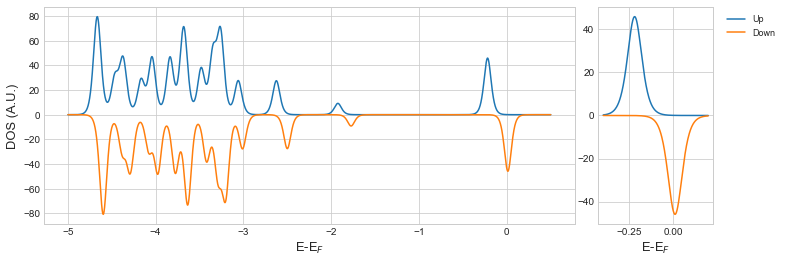

In [20]:
grafico_cluster('ag12Bic.dos',-3.908,-0.4,0.2, 'Ag12Bic')

## Átomo Plata Lateral

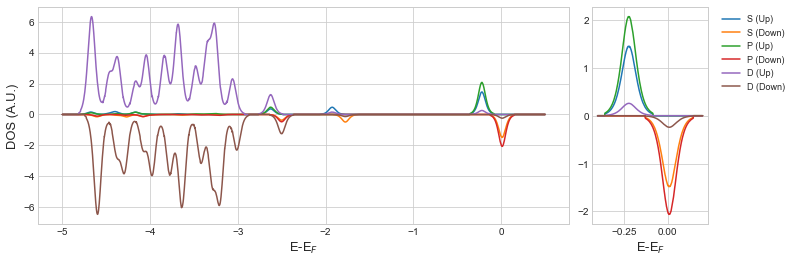

In [21]:
grafico_unico('ag12Bic.dos.pdos_atm#2(Ag)',-3.908,-0.4,0.2,'plata_lateral_Ag12Bic')

## Átomo Bismuto Central

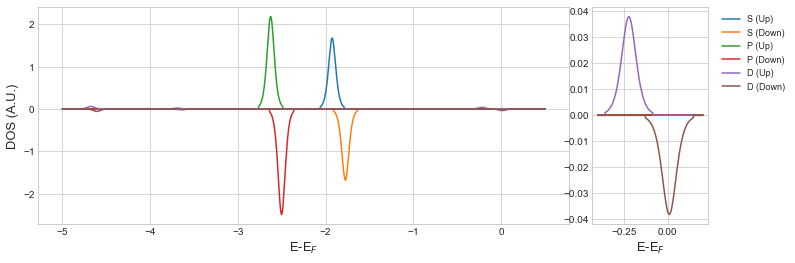

In [22]:
grafico_unico('ag12Bic.dos.pdos_atm#8(Bi)',-3.908,-0.4,0.2,'bismuto_central_Ag12Bic')

In [23]:
dic = {}
dic['Ag12Bic'] = [magne('ag12Bic.dos',-3.908,-1),carga('ag12Bic.dos',-3.908)]
dic['Plata Lateral'] = [magne_parcial('ag12Bic.dos.pdos_atm#2(Ag)',-3.908,-1),carga_parcial('ag12Bic.dos.pdos_atm#2(Ag)',-3.908)]
dic['Bismuto Central'] = [magne_parcial('ag12Bic.dos.pdos_atm#8(Bi)',-3.908,-1),carga_parcial('ag12Bic.dos.pdos_atm#8(Bi)',-3.908)]


Ag12Bic_df = df = pd.DataFrame(dic).T
Ag12Bic_df.columns = ['Magnetizacion', 'Carga']
Ag12Bic_df

,Magnetizacion,Carga
Ag12Bic,3.002800,146.529603
Plata Lateral,0.241240,10.930322
Bismuto Central,0.002416,13.338682


In [24]:
dic = {}
dic['Ag12Bic'] = [delta_magne('ag12Bic.dos',-3.908,-1),delta_carga('ag12Bic.dos',-3.908)]
dic['Plata Lateral'] = [delta_magne_parcial('ag12Bic.dos.pdos_atm#2(Ag)',-3.908,-1),delta_carga_parcial('ag12Bic.dos.pdos_atm#2(Ag)',-3.908)]
dic['Bismuto Central'] = [delta_magne_parcial('ag12Bic.dos.pdos_atm#8(Bi)',-3.908,-1),delta_carga_parcial('ag12Bic.dos.pdos_atm#8(Bi)',-3.908)]


Ag12Bic_df = df = pd.DataFrame(dic).T
Ag12Bic_df.columns = ['Delta Magnetizacion', 'Delta Carga']
Ag12Bic_df

,Delta Magnetizacion,Delta Carga
Ag12Bic,0.00001,0.000238
Plata Lateral,0.00003,0.000713
Bismuto Central,0.00003,0.000713


# Ag12Bil

In [25]:
cd ../../ag12bil/dos

/Users/esteban/quantumEspresso/ag12bil/dos


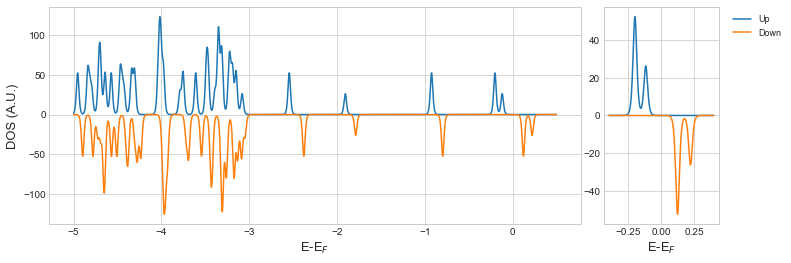

In [26]:
grafico_cluster('ag12Bil.dos',-3.705,-0.4,0.4, 'Ag12Bil')

## Bismuto Lateral

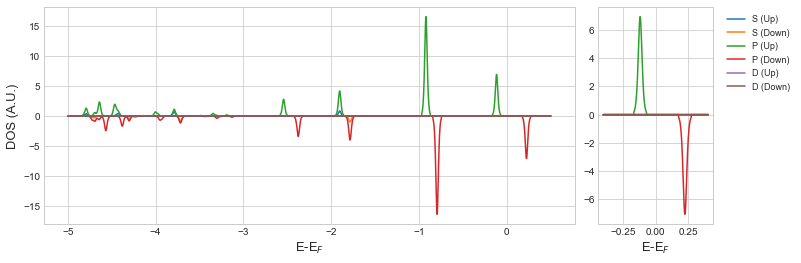

In [27]:
grafico_unico('ag12Bil.dos.pdos_atm#10(Bi)',-3.705,-0.4,0.4, 'bimuto_lateral_Ag12Bil')

# Primer Vecino Plata

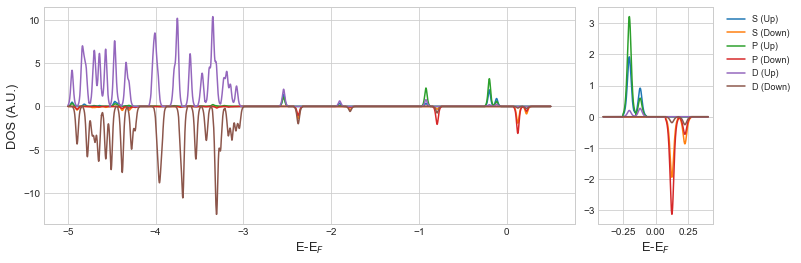

In [28]:
grafico_unico('ag12Bil.dos.pdos_atm#2(Ag)',-3.705,-0.4,0.4,'plata_primer_vecino_Ag12Bil')

## Segundo Vecino Plata

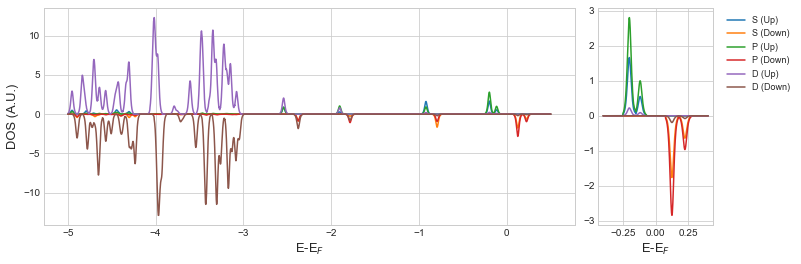

In [29]:
grafico_unico('ag12Bil.dos.pdos_atm#5(Ag)',-3.705,-0.4,0.4,'plata_segundo_vecino_Ag12Bil')

## Lejano Plata

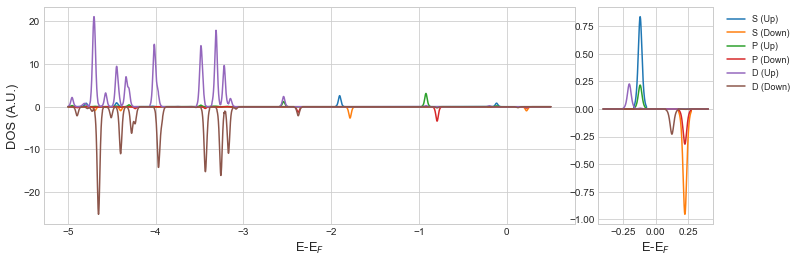

In [30]:
grafico_unico('ag12Bil.dos.pdos_atm#7(Ag)',-3.705,-0.4,0.4,'plata_lejano_Ag12Bil')

## Central Plata

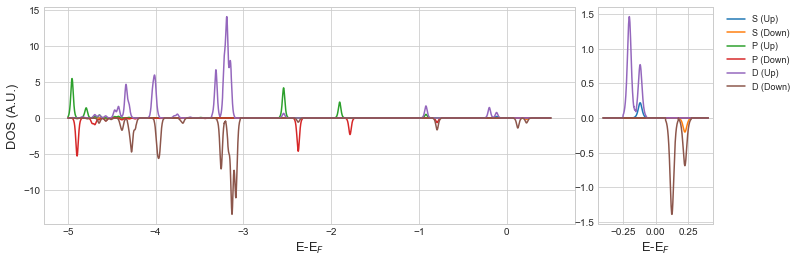

In [31]:
grafico_unico('ag12Bil.dos.pdos_atm#8(Ag)',-3.705,-0.4,0.4,'plata_central_Ag12Bil')

In [32]:
dic = {}
dic['Ag12Bil'] = [magne('ag12Bil.dos',-3.705,-0.4),carga('ag12Bil.dos',-3.705)]
dic['Bismuto Lateral'] = [magne_parcial('ag12Bil.dos.pdos_atm#10(Bi)',-3.705,-0.4), carga_parcial('ag12Bil.dos.pdos_atm#10(Bi)',-3.705)]
dic['Primer Vecino Plata'] = [magne_parcial('ag12Bil.dos.pdos_atm#2(Ag)',-3.705,-0.4),carga_parcial('ag12Bil.dos.pdos_atm#2(Ag)',-3.705)]
dic['Segundo Vecino Plata'] = [magne_parcial('ag12Bil.dos.pdos_atm#5(Ag)',-3.705,-0.4), carga_parcial('ag12Bil.dos.pdos_atm#5(Ag)',-3.705)]
dic['Central Plata'] = [magne_parcial('ag12Bil.dos.pdos_atm#8(Ag)',-3.705,-0.4), carga_parcial('ag12Bil.dos.pdos_atm#8(Ag)',-3.705)]
dic['Lejano Plata'] = [magne_parcial('ag12Bil.dos.pdos_atm#7(Ag)',-3.705,-0.4), carga_parcial('ag12Bil.dos.pdos_atm#7(Ag)',-3.705)]

Ag12Bil_df = df = pd.DataFrame(dic).T
Ag12Bil_df.columns = ['Magnetizacion', 'Carga']
Ag12Bil_df

,Magnetizacion,Carga
Ag12Bil,3.000030,146.946143
Bismuto Lateral,0.262023,14.345309
Primer Vecino Plata,0.267903,10.883497
Segundo Vecino Plata,0.238172,10.824352
Central Plata,0.092114,11.267601
Lejano Plata,0.048527,10.777543


In [33]:
dic = {}
dic['Ag12Bil'] = [delta_magne('ag12Bil.dos',-3.705,-0.4),delta_carga('ag12Bil.dos',-3.705)]
dic['Bismuto Lateral'] = [delta_magne_parcial('ag12Bil.dos.pdos_atm#10(Bi)',-3.705,-0.4), delta_carga_parcial('ag12Bil.dos.pdos_atm#10(Bi)',-3.705)]
dic['Primer Vecino Plata'] = [delta_magne_parcial('ag12Bil.dos.pdos_atm#2(Ag)',-3.705,-0.4),delta_carga_parcial('ag12Bil.dos.pdos_atm#2(Ag)',-3.705)]
dic['Segundo Vecino Plata'] = [delta_magne_parcial('ag12Bil.dos.pdos_atm#5(Ag)',-3.705,-0.4), delta_carga_parcial('ag12Bil.dos.pdos_atm#5(Ag)',-3.705)]
dic['Central Plata'] = [delta_magne_parcial('ag12Bil.dos.pdos_atm#8(Ag)',-3.705,-0.4), delta_carga_parcial('ag12Bil.dos.pdos_atm#8(Ag)',-3.705)]
dic['Lejano Plata'] = [delta_magne_parcial('ag12Bil.dos.pdos_atm#7(Ag)',-3.705,-0.4), delta_carga_parcial('ag12Bil.dos.pdos_atm#7(Ag)',-3.705)]

Ag12Bil_df = df = pd.DataFrame(dic).T
Ag12Bil_df.columns = ['Delta Magnetizacion', 'Delta Carga']
Ag12Bil_df

,Delta Magnetizacion,Delta Carga
Ag12Bil,0.000004,0.000226
Bismuto Lateral,0.000012,0.000679
Primer Vecino Plata,0.000012,0.000679
Segundo Vecino Plata,0.000012,0.000679
Central Plata,0.000012,0.000679
Lejano Plata,0.000012,0.000679


# Bismuto Aislado

In [50]:
cd ../../bismuto/dos

/Users/esteban/quantumEspresso/bismuto/dos


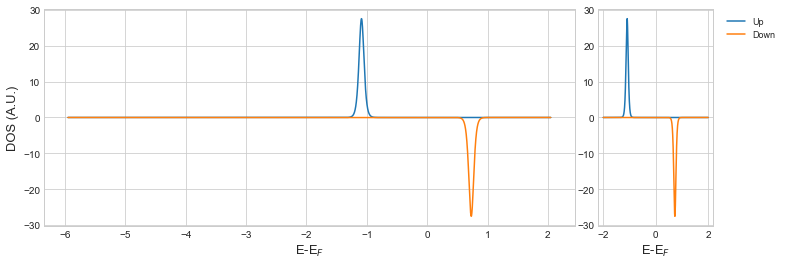

total magnetización átomo de Bismuto aislado:  2.999981685373285


In [51]:
mag = np.loadtxt('bismuto.dos')
mag = mag[mag[:,0]<-2]
mag = mag[mag[:,0]>-10]

mag[:,0] = mag[:,0]+4.048

fig = plt.figure()

ax0 = plt.subplot2grid((1, 5), (0, 0), colspan=4, label="Up")
ax1 = plt.subplot2grid((1, 5), (0, 4), colspan=1, label="Down")

ax0.set_xlabel(r"E-E$_{F}$",fontsize=13)
ax0.set_ylabel(r"DOS (A.U.)",fontsize=13)

ax0.plot(mag[:,0],mag[:,1])
ax0.plot(mag[:,0],-mag[:,2])

mag_ = mag[mag[:,0]<2]
mag_ = mag_[mag_[:,0]>-2]

ax1.plot(mag_[:,0],mag_[:,1], label="Up")
ax1.plot(mag_[:,0],-mag_[:,2],label="Down")

ax1.set_xlabel(r"E-E$_{F}$",fontsize=13)

plt.legend(loc='upper left', fontsize=9, bbox_to_anchor=(1.05, 1.0))
fig.set_size_inches(12, 4)
plt.show()

mag_ = mag[mag[:,0]<0]

print('total magnetización átomo de Bismuto aislado: ', mag_[:,1].sum()*0.001-mag_[:,2].sum()*0.001)

In [53]:
mag = np.loadtxt('bismuto.dos')
mag_ = mag[mag[:,0]<-4.048]
print('carga total : ', (mag_[:,1]+mag_[:,2]).sum()*0.001)

carga total :  14.999988559901329


# Plata Aislado

In [54]:
cd ../../plata/dos

/Users/esteban/quantumEspresso/plata/dos


<function carga at 0x117d569d0>


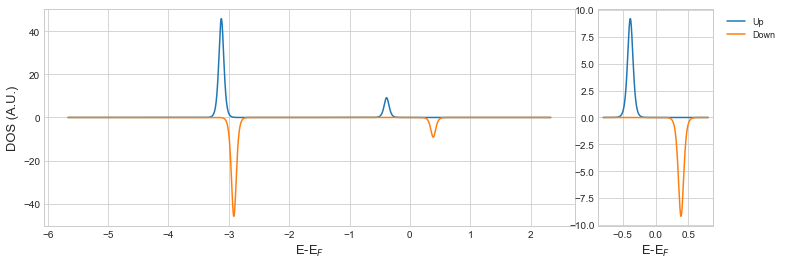

total magnetización de la Plata aislada:  1.000041239696352


In [55]:
mag = np.loadtxt('plata.dos')

print(carga)
mag = mag[mag[:,0]<-2]
mag = mag[mag[:,0]>-10]

mag[:,0] = mag[:,0]+4.334

fig = plt.figure()

ax0 = plt.subplot2grid((1, 5), (0, 0), colspan=4, label="Up")
ax1 = plt.subplot2grid((1, 5), (0, 4), colspan=1, label="Down")

ax0.set_xlabel(r"E-E$_{F}$",fontsize=13)
ax0.set_ylabel(r"DOS (A.U.)",fontsize=13)

ax0.plot(mag[:,0],mag[:,1])
ax0.plot(mag[:,0],-mag[:,2])

mag_ = mag[mag[:,0]<0.8]
mag_ = mag_[mag_[:,0]>-0.8]

ax1.plot(mag_[:,0],mag_[:,1], label="Up")
ax1.plot(mag_[:,0],-mag_[:,2],label="Down")

ax1.set_xlabel(r"E-E$_{F}$",fontsize=13)

plt.legend(loc='upper left', fontsize=9, bbox_to_anchor=(1.05, 1.0))
fig.set_size_inches(12, 4)
plt.show()

mag_ = mag[mag[:,0]<0]

print('total magnetización de la Plata aislada: ', mag_[:,1].sum()*0.001-mag_[:,2].sum()*0.001)

In [56]:
mag = np.loadtxt('plata.dos')
mag_ = mag[mag[:,0]<-4.334]
print('carga total ',(mag_[:,1]+mag_[:,2]).sum()*0.001)

carga total  10.99987784746878
